# **Efficientnet**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from zipfile import ZipFile
File_name='/content/drive/MyDrive/Project/2500latest.zip'
with ZipFile(File_name,'r') as zip:
   zip.extractall()
   print('done')

done


In [5]:
import numpy as np
import seaborn as sns
#from keras_preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import img_to_array,load_img
import matplotlib.pyplot as plt
import os
print(os.listdir("/content/s2500latest/2500latest/"))
%matplotlib inline

['surprise', 'fear', 'neutral', 'happy', 'disgust', 'sad', 'angry']


In [6]:

!pip install split-folders
import splitfolders 
splitfolders.ratio("/content/s2500latest/2500latest/", output="/content/new2500/", seed=1337, ratio=(.8, .1, .1), group_prefix=None) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 17500 files [00:02, 7705.63 files/s]


In [7]:
train_dir = '/content/new2500/train/'
test_dir = '/content/new2500/test/'
val_dir='/content/new2500/val/'

nb_classes = len(os.listdir('/content/new2500/train/'))
nb_classes


7

In [8]:
pic_size = 224

In [9]:
base_path = "/content/new2500/"

In [10]:

plt.figure(0, figsize=(12,20))
cpt = 0

<Figure size 864x1440 with 0 Axes>

<ipython-input-11-f2af4440e899>:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


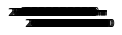

In [11]:
for expression in os.listdir(base_path + "train/"):
    for i in range(1,10):
        cpt = cpt + 1
        plt.subplot(432,288,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [12]:
for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")

2000 surprise images
2000 fear images
2000 neutral images
2000 happy images
2000 disgust images
2000 sad images
2000 angry images


In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
batch_size = 128

In [15]:
datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()
datagen_test= ImageDataGenerator()

In [16]:
Train_gen = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)
Valid_gen = datagen_validation.flow_from_directory(base_path + "val",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)
test_generator = datagen_test.flow_from_directory(base_path + "test",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 14000 images belonging to 7 classes.
Found 1750 images belonging to 7 classes.
Found 1750 images belonging to 7 classes.


In [17]:
import tensorflow as tf
from keras.layers import AveragePooling2D ,Dropout ,Dense , Conv2D , Input
from keras.models import  Model

In [20]:
from keras.applications.densenet import DenseNet
from keras.applications.resnet import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.efficientnet import EfficientNetB0

In [21]:
from keras.backend import dropout
from keras.layers.serialization import activation
img_size=224
Bs=128
Train_gen = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)
Valid_gen = datagen_validation.flow_from_directory(base_path + "val",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

base_model= EfficientNetB0(include_top=False,weights='imagenet',input_shape=(img_size,img_size,3))
x=base_model.output
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x)
x=Dropout(rate=.5)(x)
x=Dense(7   ,activation='softmax')(x)
 

con_model=Model(inputs=base_model.input ,outputs=x)
for layer in base_model.layers:
  layer.trainable=False

con_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Found 14000 images belonging to 7 classes.
Found 1750 images belonging to 7 classes.
16705208/16705208 [==============================] - 1s 0us/step


In [22]:
epochs=50
hist = con_model.fit_generator(
    Train_gen,
    epochs=epochs,
    validation_data=Valid_gen
)


<ipython-input-22-5551bde757ae>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = con_model.fit_generator(


Epoch 1/50
110/110 [==============================] - 56s 372ms/step - loss: 1.6338 - accuracy: 0.3739 - val_loss: 1.3699 - val_accuracy: 0.4994
Epoch 2/50
110/110 [==============================] - 34s 306ms/step - loss: 1.3841 - accuracy: 0.4916 - val_loss: 1.1751 - val_accuracy: 0.5931
Epoch 3/50
110/110 [==============================] - 33s 301ms/step - loss: 1.2522 - accuracy: 0.5504 - val_loss: 1.0535 - val_accuracy: 0.6600
Epoch 4/50
110/110 [==============================] - 33s 295ms/step - loss: 1.1426 - accuracy: 0.5887 - val_loss: 1.0178 - val_accuracy: 0.6560
Epoch 5/50
110/110 [==============================] - 33s 296ms/step - loss: 1.0529 - accuracy: 0.6345 - val_loss: 0.8675 - val_accuracy: 0.7257
Epoch 6/50
110/110 [==============================] - 33s 298ms/step - loss: 0.9775 - accuracy: 0.6630 - val_loss: 0.7813 - val_accuracy: 0.7651
Epoch 7/50
110/110 [==============================] - 32s 292ms/step - loss: 0.9167 - accuracy: 0.6870 - val_loss: 0.7166 - val_ac

In [23]:
loss, accuracy = con_model.evaluate(test_generator)

14/14 [==============================] - 4s 234ms/step - loss: 0.3892 - accuracy: 0.8891


In [ ]:
'''''''model_json = con_model.to_json()''''
with open("model.json", "w") as json_file:
    json_file.write(model_json)'''''

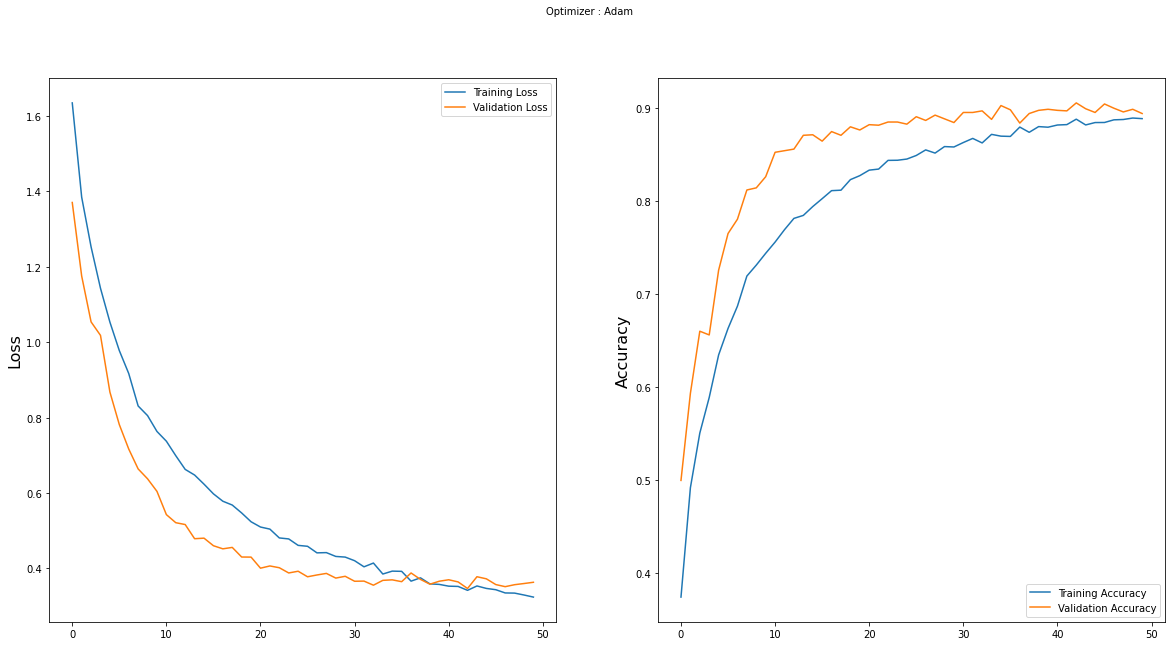

In [25]:
history=hist
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

<ipython-input-26-c4935754a0a9>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = con_model.predict_generator(generator=test_generator)


<Figure size 432x288 with 0 Axes>

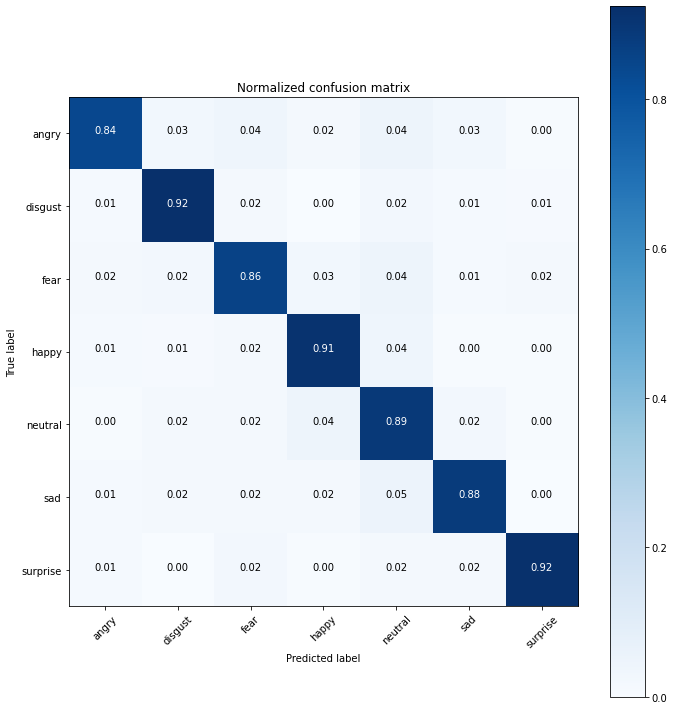

In [26]:
predictions = con_model.predict_generator(generator=test_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_generator.classes
class_names = test_generator.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45) 
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [27]:
Train_gen.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [28]:
labels = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [29]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [30]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
plt.show()

In [31]:
import pandas as pd
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report_dict)

,0,1,2,3,4,5,6,accuracy,macro avg,weighted avg
precision,0.925110,0.909449,0.856,0.894118,0.798561,0.898374,0.958333,0.889143,0.891421,0.891421
recall,0.840000,0.924000,0.856,0.912000,0.888000,0.884000,0.920000,0.889143,0.889143,0.889143
f1-score,0.880503,0.916667,0.856,0.902970,0.840909,0.891129,0.938776,0.889143,0.889565,0.889565
support,250.000000,250.000000,250.000,250.000000,250.000000,250.000000,250.000000,0.889143,1750.000000,1750.000000
